### Redes Residuais

As redes residuais (ResNets) são uma arquitetura de rede neural profunda onde a ideia principal é adicionar uma conexão direta entre a entrada de uma camada e a saída dessa camada, formando o que chamamos de "atalho" ou "skip connection". Esse atalho permite que a rede aprenda a adicionar pequenas correções (ou perturbações) à entrada, em vez de aprender uma representação completamente nova. Abaixo um exemplo básico de como você pode implementar uma rede residual simples com o CIFAR-10 usando TensorFlow e Keras:


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [2]:
# Função para criar um bloco residual
def residual_block(x, filters, kernel_size=3, stride=1):
    
    shortcut = x                                 # Atalho
    
    # Primeira Convolução
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Segunda Convolução
    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Adiciona a atalho (skip connection)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

In [3]:
# Função para construir a rede residual
def build_residual_network(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Camada de entrada
    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Blocos residuais
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    
    # Camada Global Average Pooling e Dense para classificação
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, x)
    return model

In [4]:

# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar os dados
x_train = x_train.astype('float32') / 256.0
x_test = x_test.astype('float32') / 256.0

# Definir o número de classes
num_classes = 10

# Construir e compilar o modelo
model = build_residual_network(input_shape=(32, 32, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
import matplotlib.pyplot as plt

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 234s 321ms/step - accuracy: 0.3690 - loss: 1.7896 - val_accuracy: 0.3052 - val_loss: 2.5452
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 229s 326ms/step - accuracy: 0.5528 - loss: 1.2431 - val_accuracy: 0.3978 - val_loss: 1.9687
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 226s 321ms/step - accuracy: 0.6280 - loss: 1.0497 - val_accuracy: 0.5634 - val_loss: 1.2051
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 228s 324ms/step - accuracy: 0.6804 - loss: 0.9152 - val_accuracy: 0.5762 - val_loss: 1.2352
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 225s 319ms/step - accuracy: 0.7152 - loss: 0.8164 - val_accuracy: 0.6660 - val_loss: 0.9336
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 224s 317ms/step - accuracy: 0.7432 - loss: 0.7312 - val_accuracy: 0.5430 - val_loss: 1.5816
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 225s 320ms/step - accuracy: 0.7671 - loss: 0.6684 - val_accuracy: 0.6532 - val_loss: 1.0503
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 223s 317ms/step - accuracy: 0.7859 -

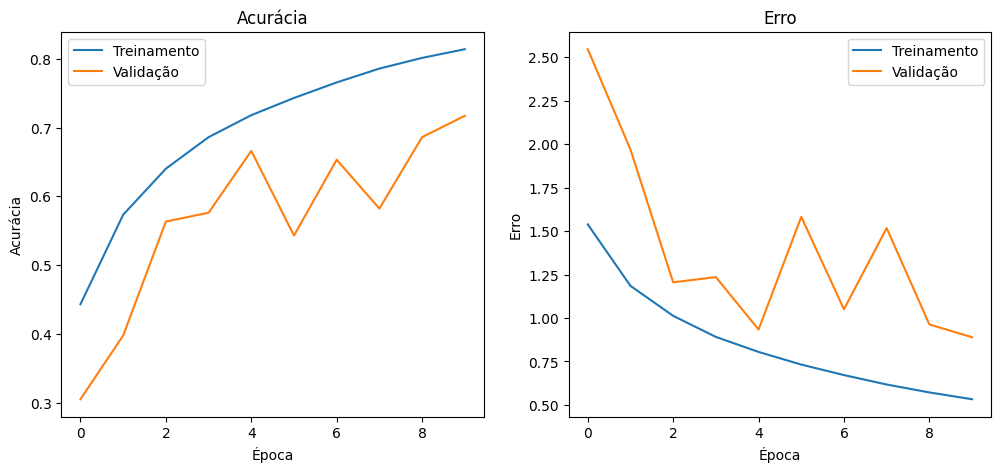

In [6]:
# Treinar o modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Plotar erro e acurácia
def plot_metrics(history):
    # Plotar a acurácia
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title('Acurácia')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend()

    # Plotar o erro
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Erro')
    plt.xlabel('Época')
    plt.ylabel('Erro')
    plt.legend()

    plt.show()

# Plotar métricas
plot_metrics(history)